In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "cyclistic-bike-share-july-22-june-23"

In [2]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(knitr)
library(rmarkdown)


july_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202207-divvy-tripdata.csv")
august_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202208-divvy-tripdata.csv")
september_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202209-divvy-tripdata.csv")
october_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202210-divvy-tripdata.csv")
november_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202211-divvy-tripdata.csv")
december_2022 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202212-divvy-tripdata.csv")
january_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202301-divvy-tripdata.csv")
february_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202302-divvy-tripdata.csv")
march_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202303-divvy-tripdata.csv")
april_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202304-divvy-tripdata.csv")
may_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202305-divvy-tripdata.csv")
june_2023 <- read_csv("../input/cyclistic-bike-share-july-22-june-23/202306-divvy-tripdata.csv")


all_trips <- bind_rows(july_2022, august_2022, september_2022, october_2022, november_2022, december_2022, january_2023, february_2023, march_2023, april_2023, may_2023, june_2023)


all_trips <- all_trips %>%  
  select(-c(start_lat, start_lng, end_lat, end_lng))

all_trips$date <- as.Date(all_trips$started_at) #The default format is yyyy-mm-dd
all_trips$month <- format(as.Date(all_trips$date), "%m")
all_trips$day <- format(as.Date(all_trips$date), "%d")
all_trips$year <- format(as.Date(all_trips$date), "%Y")
all_trips$day_of_week <- format(as.Date(all_trips$date), "%A")

all_trips$ride_length <- difftime(all_trips$ended_at,all_trips$started_at)

all_trips$ride_length <- as.numeric(as.character(all_trips$ride_length))

all_trips$ride_length_min <- all_trips$ride_length / 60

all_trips_v2 <- all_trips[!(all_trips$start_station_name == "HQ QR" | all_trips$ride_length<0),] %>% drop_na()


Rows: 823488 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 785932 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): ride_id, rideable_type, start_station_name, start_station_id, end_...
dbl  (4): start_lat, start_lng, end_lat, end_lng
dttm (2): started_at, ended_at

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 701339 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7

# Plan

## - <span style="color: #F78181">Business task</span>
## - <span style="color: #F7BE81;">Description of the data</span>
## - <span style="color: #D7DF01;">Data preparation</span>
## - <span style="color: #9FF781;">Analysis</span>
## - <span style="color: #58D3F7;">Key findings</span>
## - <span style="color: #BCA9F5;">Recommendations</span>

<br>

# Business task:   
## How do annual members and casual riders use Cyclistic bikes differently?

<br><br>

# Description of the data

I used Cyclistic’s historical trip data for the last 12 months. After I combined all 12 files together and cleaned the data from personal information, I got a big data file, containing <br> 5 779 444 rows and 9 columns:

- ride_id  &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp; - special ride id number
- rideable_type &emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; - type of bike
- started_at &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp; - start trip time
- ended_at &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp; - end trip time
- start_station_name &emsp;&emsp; - name of start trip station
- start_station_id &emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp; - special id of start trip station
- end_station_name &emsp;&emsp;&nbsp; - name of end trip station
- end_station_id &emsp;&emsp;&emsp;&emsp; - special id of end trip station
- member_casual &emsp;&emsp;&emsp;&nbsp;&nbsp; - type of users



# Data preparation 

The most important for me was to figure out what's the difference in trips between membership holders and casual users.

First of all, I checked that there are only two types of membership (member or casual), as it is supposed to be.

Then I split the time data into several columns - such as day, month, and year - that provide more opportunities to aggregate the data.


## Some calculations 

I decided to add a calculated field for the length of the ride (in minutes) for future comparisons.

After that, I cleaned this data so it would be numeric (for future calculations) and credible.

Let's have a look at the mean, median, min, and max values of the trip's length.

In [3]:
summary(all_trips_v2$ride_length_min)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    0.00     5.72    10.00    16.05    17.85 32035.45 

But it is more informative for us to have a look at this information, divided by membership holders and casual users.

## Mean:

In [4]:
aggregate(all_trips_v2$ride_length_min ~ all_trips_v2$member_casual, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$ride_length_min
<chr>,<dbl>
casual,22.49666
member,12.10124


## Median:

In [5]:
aggregate(all_trips_v2$ride_length_min ~ all_trips_v2$member_casual, FUN = median)

all_trips_v2$member_casual,all_trips_v2$ride_length_min
<chr>,<dbl>
casual,12.850000
member,8.666667


As we can see, in both cases (mean and median) casual users' rides are longer than membership holders'.

## Max:


In [6]:
aggregate(all_trips_v2$ride_length_min ~ all_trips_v2$member_casual, FUN = max)

all_trips_v2$member_casual,all_trips_v2$ride_length_min
<chr>,<dbl>
casual,32035.450
member,1497.867


## Min:

In [7]:
aggregate(all_trips_v2$ride_length_min ~ all_trips_v2$member_casual, FUN = min)

all_trips_v2$member_casual,all_trips_v2$ride_length_min
<chr>,<dbl>
casual,0
member,0


In [8]:
all_trips_v2$day_of_week <- ordered(all_trips_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))
aggregate(all_trips_v2$ride_length_min ~ all_trips_v2$member_casual + all_trips_v2$day_of_week, FUN = mean)

all_trips_v2$member_casual,all_trips_v2$day_of_week,all_trips_v2$ride_length_min
<chr>,<ord>,<dbl>
casual,Sunday,25.76189
member,Sunday,13.42435
casual,Monday,22.49960
member,Monday,11.53682
casual,Tuesday,19.96077
member,Tuesday,11.53241
casual,Wednesday,19.37181
member,Wednesday,11.59861
casual,Thursday,19.69313


# Analysis

Let's prepare a small dataset for further analysis.

We will use information about the number of rides and average duration of trips per day of the week, grouped by our 2 categories: membership holders and casual users.

Let's have a look at our new dataset.

In [9]:
casual_member_trips <- all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, weekday) %>%  #groups by usertype and weekday
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length_min)) %>% 		# calculates the average duration
  arrange(member_casual, weekday) 								# sorts


`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


## Data subset

In [10]:
paged_table(casual_member_trips, options = list(rows.print = 15))

member_casual,weekday,number_of_rides,average_duration
<chr>,<ord>,<int>,<dbl>
casual,Sun,267191,25.76189
casual,Mon,189316,22.49960
casual,Tue,190148,19.96077
casual,Wed,204943,19.37181
casual,Thu,219864,19.69313
casual,Fri,254726,21.70055
casual,Sat,349415,25.55547
member,Sun,295398,13.42435
member,Mon,376537,11.53682


## Let's visualize the number of rides by rider type

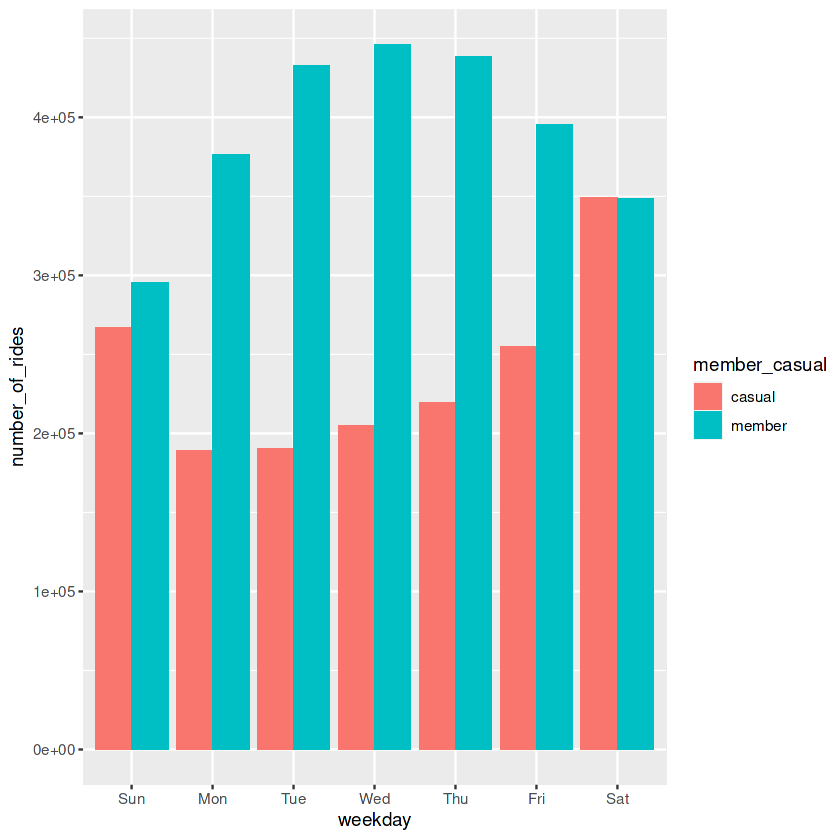

In [11]:
casual_member_trips %>% 
  ggplot(aes(x = weekday, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

## Visualization for the average duration (in minutes)

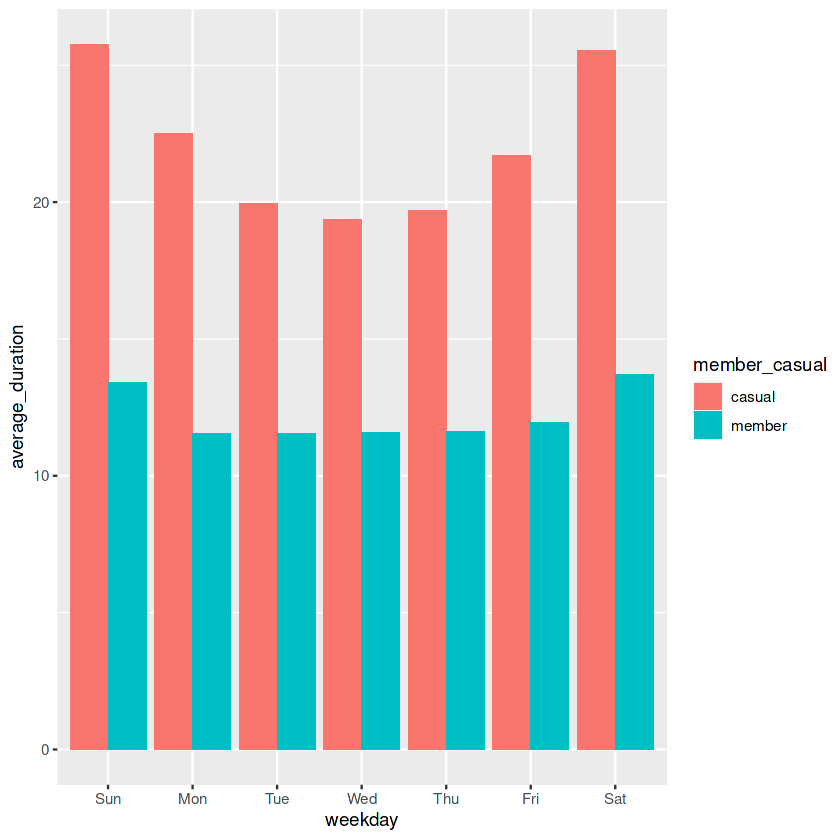

In [12]:
casual_member_trips %>% 
  ggplot(aes(x = weekday, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

## Total amount of time (total = average duration * number of rides, in hours)

In [13]:
casual_member_trips$sum_ride_length <- casual_member_trips$average_duration * casual_member_trips$number_of_rides / 60

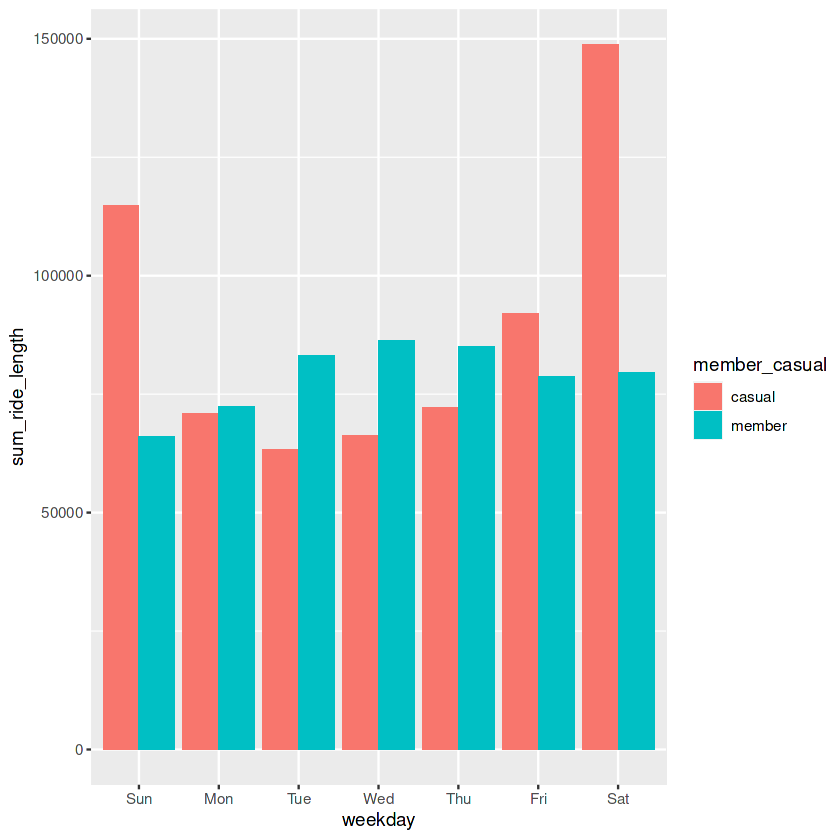

In [14]:
casual_member_trips %>% 
  ggplot(aes(x = weekday, y = sum_ride_length, fill = member_casual)) +
  geom_col(position = "dodge")

## Conclusions

During working days membership holders have twice more trips, but they are shorter than casual users' (also twice).

On weekends they have almost the same amount of trips, but casual users spend more time on each trip (2.5 times more).

If we look at the plot with summary duration for both categories, we can see, that on Monday-Friday membership holders and casual users spent the same amount of time on their trips.

But on Saturday-Sunday casual customers spend much more time (twice more) on their trips.

## New data subset

Let's prepare a new dataset.

We will also use information about the number of rides and average duration of trips, but this time we want to analyze changes during the year, grouped by our 2 categories: membership holders and casual users.

Let's have a look at our new dataset.

In [15]:
casual_member_month_trips <- all_trips_v2 %>% 
  group_by(member_casual, month) %>%  #groups by usertype and month
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length_min)) %>% 		# calculates the average duration
  arrange(member_casual, month)

`summarise()` has grouped output by 'member_casual'. You can override using the
`.groups` argument.


## Data subset (for casual users)

In [16]:
paged_table(casual_member_month_trips %>% filter(member_casual == "casual"), options = list(rows.print = 25))

member_casual,month,number_of_rides,average_duration
<chr>,<chr>,<int>,<dbl>
casual,01,29621,14.87888
casual,02,32776,17.67230
casual,03,46792,16.71918
casual,04,110537,22.62086
casual,05,177037,24.52475
casual,06,219803,24.07359
casual,07,311670,25.09333
casual,08,270089,23.28440
casual,09,220913,21.80400


## Data subset (for membership holders)

In [17]:
paged_table(casual_member_month_trips %>% filter(member_casual == "member"), options = list(rows.print = 25))

member_casual,month,number_of_rides,average_duration
<chr>,<chr>,<int>,<dbl>
member,01,118663,10.00448
member,02,116784,10.42200
member,03,153655,10.17087
member,04,213657,11.55596
member,05,286185,12.69381
member,06,314962,12.94459
member,07,330996,13.50329
member,08,335224,13.10607
member,09,314227,12.62197


## And let's have a look of our new plots.


## Number of rides:


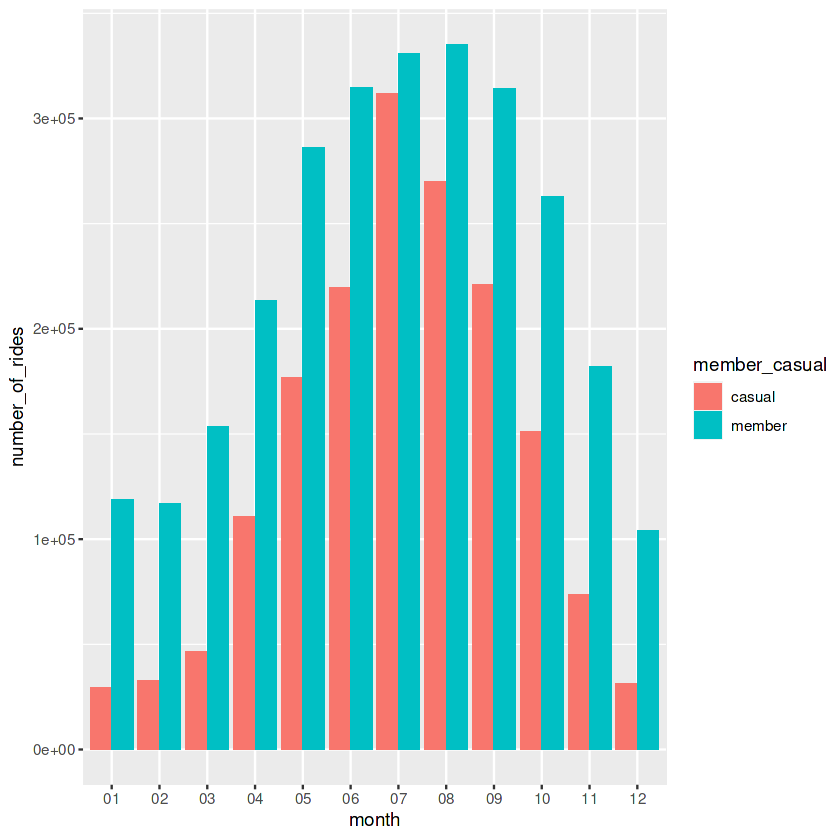

In [18]:
casual_member_month_trips %>% 
  ggplot(aes(x = month, y = number_of_rides, fill = member_casual)) +
  geom_col(position = "dodge")

## Average duration (in minutes)

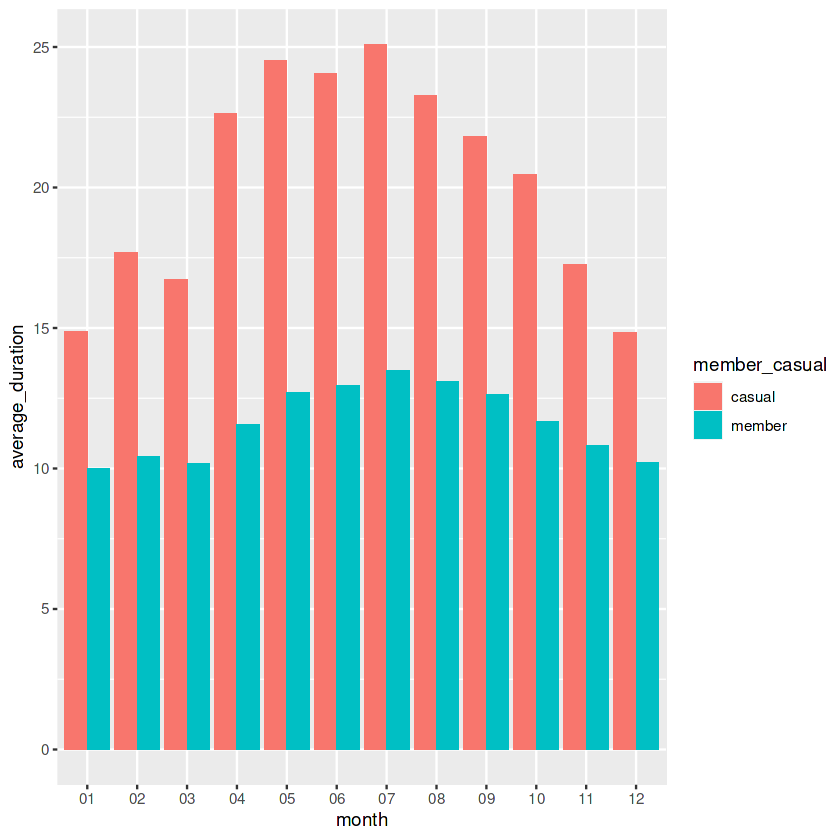

In [19]:
casual_member_month_trips %>% 
  ggplot(aes(x = month, y = average_duration, fill = member_casual)) +
  geom_col(position = "dodge")

## Total amount of time (total = average duration * number of rides, in hours)

In [20]:
casual_member_month_trips$sum_ride_length <- casual_member_month_trips$average_duration * casual_member_month_trips$number_of_rides / 60

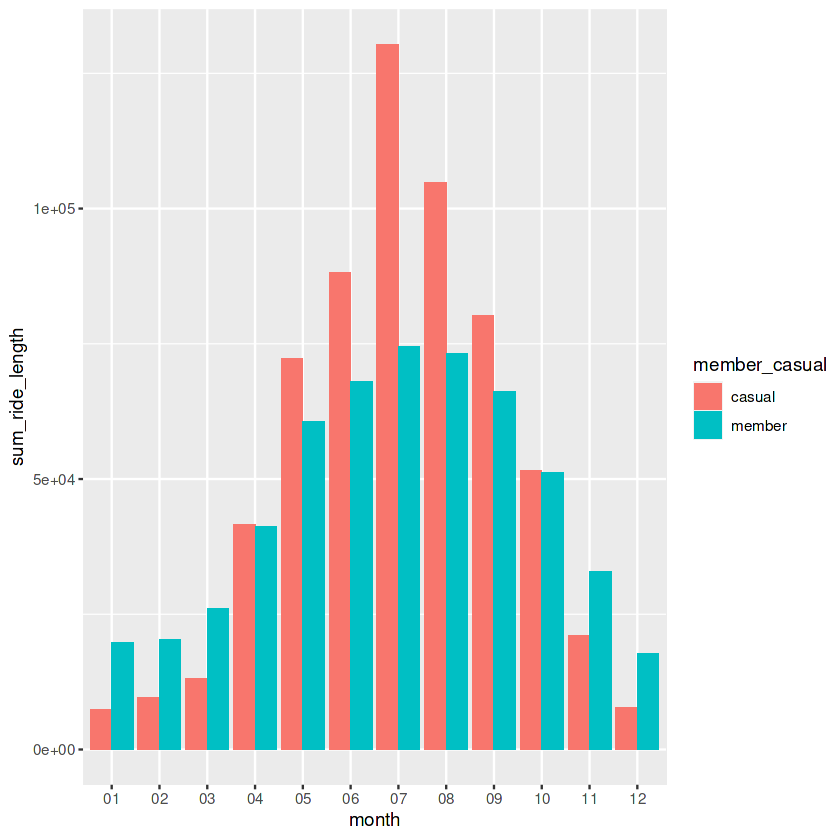

In [21]:
casual_member_month_trips %>% 
  ggplot(aes(x = month, y = sum_ride_length, fill = member_casual)) +
  geom_col(position = "dodge")

## Conclusions

Statistics during the year look similar for both categories (they both have more trips in summer). 

But membership holders have more trips per month than casual riders, especially so in winter months (almost 3 times more).

But casual users' duration of trips is twice longer than membership holders' (in every month).

## Final dataset 

Finally, I decided to combine all my findings and prepare one dataset with information about our users, divided by months and type of day (weekday or weekend), so we can have a look at our results in one slide.

This time we need just information about the average trip duration because the number of rides and total trip time will not provide useful information.

In [22]:
casual_member_year_trips <- all_trips_v2 %>% 
  mutate(weekday = wday(started_at, label = TRUE)) %>%  #creates weekday field using wday()
  group_by(member_casual, month, weekday) %>%  #groups by usertype and month
  summarise(number_of_rides = n()							#calculates the number of rides and average duration 
            ,average_duration = mean(ride_length_min)) %>% 		# calculates the average duration
  arrange(member_casual, month, weekday)

`summarise()` has grouped output by 'member_casual', 'month'. You can override
using the `.groups` argument.


In [23]:
casual_member_year_trips$weekday_weekend <- c(1:168)

In [24]:
for (i in casual_member_year_trips$weekday_weekend) {
  a = casual_member_year_trips$weekday[i]
  if (a == "Mon" | a == "Tue" | a == "Wed" | a == "Thu" | a == "Fri"){
     casual_member_year_trips$weekday_weekend[i] = "weekday"
  }
  else{
     casual_member_year_trips$weekday_weekend[i] = "weekend"
  }
}

In [25]:
casual_member_year_trips_weekday_weekend <- casual_member_year_trips %>% 
  group_by(member_casual, month, weekday_weekend) %>%  #groups by usertype and month
  summarise(number_of_rides_new = sum(number_of_rides)				#calculates the number of rides and average duration 
            ,average_duration_new = mean(average_duration)) %>% 		# calculates the average duration
  arrange(member_casual, month, weekday_weekend)

`summarise()` has grouped output by 'member_casual', 'month'. You can override
using the `.groups` argument.


In [26]:
casual_member_year_trips_weekday_weekend_new <- casual_member_year_trips_weekday_weekend %>% 
  unite("month_day_type", month, weekday_weekend, sep = " ")

## Average duration (in minutes)

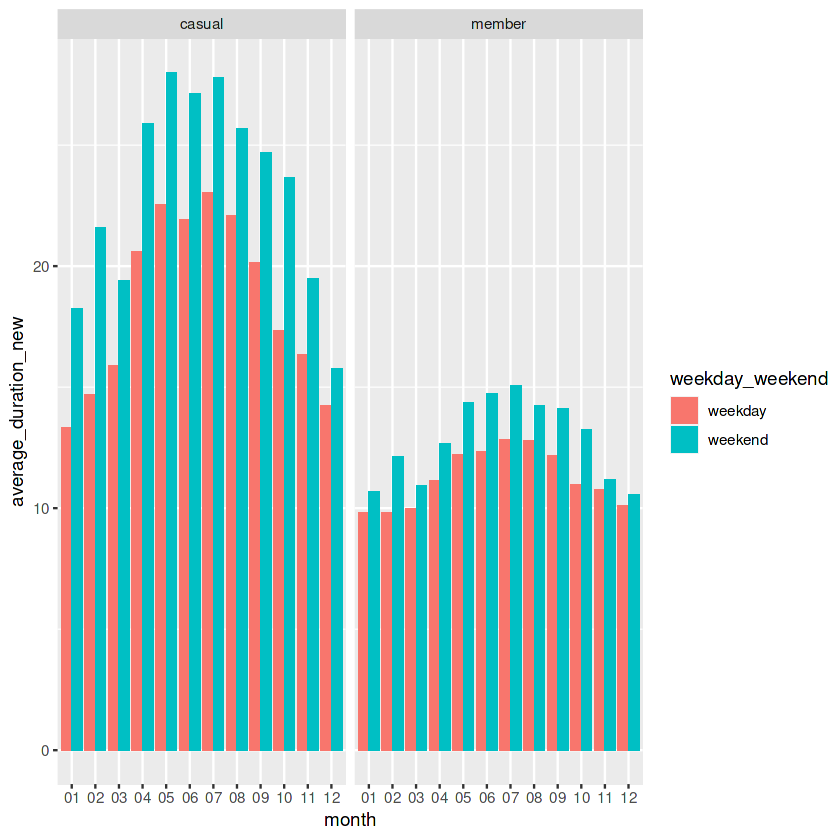

In [27]:
casual_member_year_trips_weekday_weekend %>% 
  ggplot(aes(x = month, y = average_duration_new, fill = weekday_weekend)) +
  geom_col(position = "dodge") +
  facet_wrap(~member_casual)

## Conclusions

Here we can see that casual users ride more on weekends during the whole year, and their rides increase in the summer period.

Membership holders on the other hand use bikes more stable during the whole year, regardless of the day of the week.

# Key findings

After all our analysis we can conclude that casual users are more likely to use bikes during their free time (since their trips are longer and mostly on weekends).

While membership holders use bikes as a transport to get to work or to the store (since their trips are shorter, but more regular every day during the whole year).

# Recommendations 

I think it will be a great strategy to prepare a special membership option for only the weekend (for the whole year).

And returning to our year statistics, we can conclude, that the half-year membership (for the warm months: April-October) also would be a great decision.

# Thank you for your time!